In [77]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch.optim as optim
from pytorch_tabnet.tab_model import TabNetRegressor
import matplotlib.pyplot as plt
import torch

### 数据处理

In [78]:
diabetes = datasets.load_diabetes(as_frame=True)
X, y = diabetes.data, diabetes.target

In [79]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [80]:
# 这里将sex视为分类特征
X.nunique()

age     58
sex      2
bmi    163
bp     100
s1     141
s2     302
s3      63
s4      66
s5     184
s6      56
dtype: int64

In [81]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

### TabNetRegressor回归模型

In [83]:
tabnet_params = dict(
    cat_idxs=[1],
    cat_dims=[2],
    optimizer_fn=optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size": 50, "gamma": 0.9},
    verbose=10,
)

clf = TabNetRegressor(**tabnet_params)
clf.fit(
    # X_train.shape = (n_sample, n_feature)
    X_train=X_train.values,
    # Targets should be 2D : (n_samples, n_regression)
    y_train=y_train.values.reshape(-1, 1),  # 单任务回归任务
    max_epochs=500,
    batch_size=32,
    drop_last=False
)

Device used : cuda
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 27539.10301|  0:00:00s
epoch 10 | loss: 3165.92592|  0:00:03s
epoch 20 | loss: 2903.38148|  0:00:05s
epoch 30 | loss: 2991.62079|  0:00:08s
epoch 40 | loss: 2518.69325|  0:00:10s
epoch 50 | loss: 2682.46093|  0:00:13s
epoch 60 | loss: 2690.55172|  0:00:16s
epoch 70 | loss: 2455.58278|  0:00:18s
epoch 80 | loss: 2553.29933|  0:00:21s
epoch 90 | loss: 2391.031|  0:00:23s
epoch 100| loss: 2315.54428|  0:00:26s
epoch 110| loss: 2383.77432|  0:00:28s
epoch 120| loss: 2146.96848|  0:00:31s
epoch 130| loss: 1824.34999|  0:00:34s
epoch 140| loss: 2283.08847|  0:00:36s
epoch 150| loss: 2225.07589|  0:00:39s
epoch 160| loss: 1717.45308|  0:00:42s
epoch 170| loss: 1886.09654|  0:00:44s
epoch 180| loss: 1840.40494|  0:00:47s
epoch 190| loss: 1545.84354|  0:00:49s
epoch 200| loss: 2047.04318|  0:00:52s
epoch 210| loss: 1646.47596|  0:00:55s
epoch 220| loss: 1674.55841|  0:00:57s
epoch 230| l

In [84]:
clf.history.history.keys()

dict_keys(['loss', 'lr'])

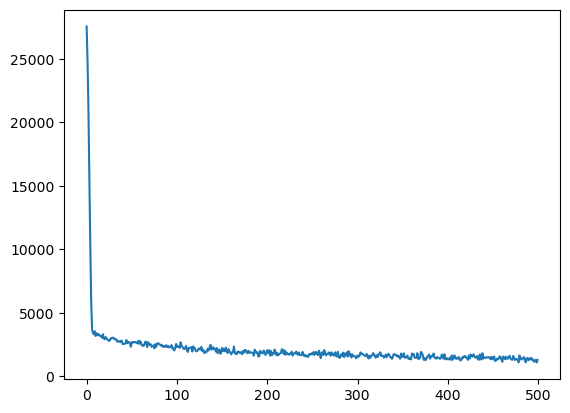

In [85]:
# plot losses
plt.plot(clf.history['loss'])
plt.show()

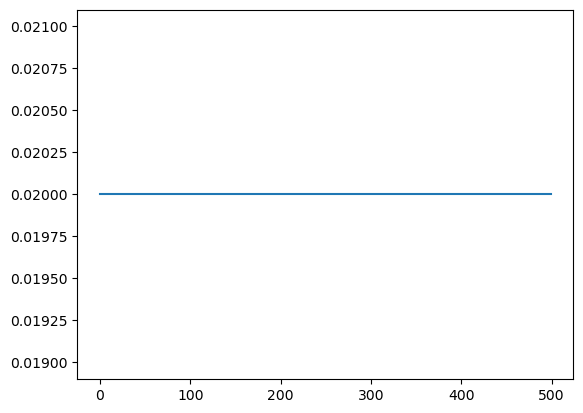

In [86]:
# plot learning rates
plt.plot(clf.history['lr'])
plt.show()

In [87]:
clf.predict(X_test.values)  # (n_sample, 1)

array([[230.0759 ],
       [192.59479],
       [224.5819 ],
       [234.24187],
       [218.02254],
       [203.55304],
       [228.00603],
       [202.94716],
       [224.81636],
       [351.5829 ],
       [226.53262],
       [263.4511 ],
       [196.83531],
       [237.98904],
       [200.76854],
       [218.55562],
       [187.41678],
       [235.3337 ],
       [188.36331],
       [232.95619],
       [231.28702],
       [235.23701],
       [191.0568 ],
       [226.99542],
       [229.9074 ],
       [119.31021],
       [193.28485],
       [220.09793],
       [223.68156],
       [211.19888],
       [199.01297],
       [226.71558],
       [213.8153 ],
       [194.17781],
       [227.78552],
       [212.45775],
       [224.88646],
       [216.72383],
       [230.57175],
       [186.06784],
       [231.25453],
       [230.7949 ],
       [ 71.31762],
       [211.19888],
       [215.89285]], dtype=float32)

In [88]:
# 特征的相对重要性
clf.feature_importances_

array([0.        , 0.61889384, 0.00570101, 0.25211067, 0.        ,
       0.        , 0.        , 0.04060729, 0.00081912, 0.08186806])